<a href="https://colab.research.google.com/github/Altusya/Case-Study/blob/main/4)_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, StratifiedKFold, LeaveOneOut
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler

url = "https://raw.githubusercontent.com/Altusya/Case-Study/main/data_new.csv"
data = pd.read_csv(url)
print("full data: ", data.shape)
pd.set_option("display.max_columns", None)
print(data.head(1))
known = data[data['y'] != "unknown"]
print("known data: ", known.shape)

full data:  (45211, 31)
   client_id  age         job  marital education  account_id in_default  \
0    1000583   43  management  married  tertiary       19298         no   

   balance housing loan   contact  campaign_id  day month  duration  campaign  \
0   -127.0      no   no  cellular        19298    6   aug       400         2   

   pdays  previous poutcome        y age_cat  age_log balance_cat  balance_pt  \
0     -1         0  unknown  unknown   36-45   3.7612    negative    -0.71255   

  duration_cat  duration_log pdays_cat  pdays_pt previous_cat  previous_pt  \
0      300-700      5.991465     never -0.472533        never      -0.4725   

   season  
0       2  
known data:  (4521, 31)


In [7]:
# Scenario 1: basic features
num_features = ["age", "balance", "duration", "pdays", "previous"]
cat_features = ["job", "marital", "education", "in_default", "housing", "loan", "month", "campaign", "poutcome"]

'''
# Scenario 2: log/power transformed num features
num_features = ["age_log", "balance_pt", "duration_log", "pdays_pt", "previous_pt"]
cat_features = ["job", "marital", "education", "in_default", "housing", "loan", "month", "campaign", "poutcome"]

# Scenario 3: num features to cat, month to season
num_features = []
cat_features = ["age_cat", "balance_cat", "duration_cat", "pdays_cat", "previous_cat",
                  "job", "marital", "education", "in_default", "housing", "loan", "season", "campaign", "poutcome"]'''
print()

In [8]:
# CREATING X AND Y MATRICES
num_features = ["age", "balance", "duration", "pdays", "previous"]
cat_features = ["job", "marital", "education", "in_default", "housing", "loan", "month", "campaign", "poutcome"]

X_num = known[num_features].values
ohe = OneHotEncoder(drop="first")
X_result = ohe.fit_transform(known[cat_features])
X_cat = X_result.toarray()
X_array = np.hstack((X_num, X_cat))
X_df = pd.DataFrame(columns=ohe.get_feature_names_out(cat_features))

y_array = known["y"].apply(lambda x: 1 if x == 'yes' else 0).values # To create a NumPy array from a pandas Series, you can use the .values attribute.


print(X_array.shape)
print(X_array)
print(y_array.shape)
print(y_array)

(4521, 69)
[[ 4.800e+01  5.543e+03  1.430e+02 ...  0.000e+00  0.000e+00  1.000e+00]
 [ 4.600e+01 -2.160e+02  4.040e+02 ...  0.000e+00  0.000e+00  1.000e+00]
 [ 3.600e+01  3.343e+03  3.070e+02 ...  0.000e+00  0.000e+00  1.000e+00]
 ...
 [ 3.300e+01  3.975e+03  5.150e+02 ...  1.000e+00  0.000e+00  0.000e+00]
 [ 4.300e+01  3.600e+01  1.180e+02 ...  0.000e+00  0.000e+00  0.000e+00]
 [ 4.900e+01  5.100e+01  9.840e+02 ...  0.000e+00  0.000e+00  1.000e+00]]
(4521,)
[0 0 0 ... 0 0 0]


In [28]:
X_num

array([[ 4.800e+01,  5.543e+03,  1.430e+02, -1.000e+00,  0.000e+00],
       [ 4.600e+01, -2.160e+02,  4.040e+02, -1.000e+00,  0.000e+00],
       [ 3.600e+01,  3.343e+03,  3.070e+02, -1.000e+00,  0.000e+00],
       ...,
       [ 3.300e+01,  3.975e+03,  5.150e+02,  1.500e+02,  1.000e+00],
       [ 4.300e+01,  3.600e+01,  1.180e+02,  1.020e+02,  2.000e+00],
       [ 4.900e+01,  5.100e+01,  9.840e+02, -1.000e+00,  0.000e+00]])

In [9]:
sampler = RandomUnderSampler(sampling_strategy='auto', random_state=5)
X_resampled, y_resampled = sampler.fit_resample(X_array, y_array)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1
 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0
 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1
 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1
 0 0 1 1 0 0 0 1 0 0]
              precision    recall  f1-score   support

           0       0.61      0.84      0.71       212
           1       0.73      0.44      0.55 

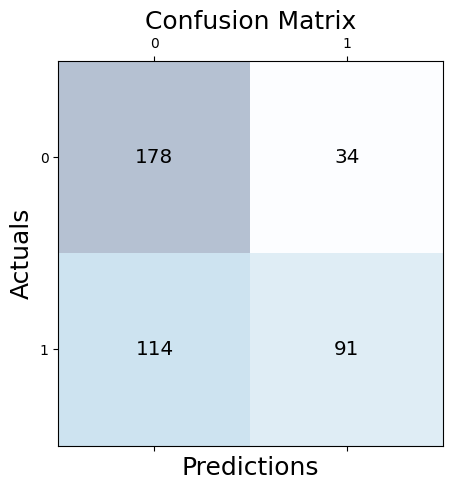

In [19]:
#NN perceptron on resampled data

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=1)

# Define a Perceptron model, with a maximum of 10 epochs
perceptron = Perceptron(max_iter=10)

# Fit the model on the training data
perceptron.fit(X_train, y_train)

# Make predictions on the test set and print the results
y_pred = perceptron.predict(X_test)
print(y_pred)
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='x-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


Random Forest Classifier:
Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       212
           1       0.82      0.87      0.85       205

    accuracy                           0.85       417
   macro avg       0.85      0.85      0.85       417
weighted avg       0.85      0.85      0.85       417



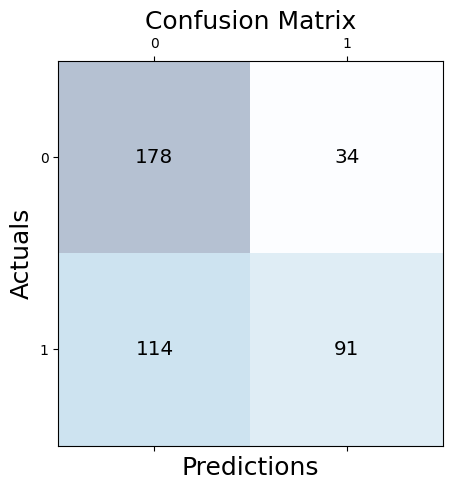


AdaBoost Classifier:
Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       212
           1       0.75      0.77      0.76       205

    accuracy                           0.76       417
   macro avg       0.76      0.76      0.76       417
weighted avg       0.76      0.76      0.76       417



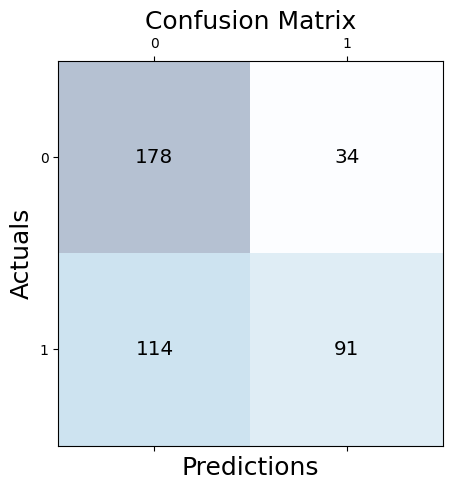

In [20]:
#Gradient boositng on resampled data

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=1)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42) #initialize

# Create an AdaBoost classifier with Decision Trees as base estimator
base_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
adaboost_classifier = AdaBoostClassifier(base_tree, n_estimators=50, random_state=42)

# Fit and evaluate the Random Forest model
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)  #predict X_test

print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.2f}")
print(classification_report(y_test, rf_pred))

# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='x-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Fit and evaluate the AdaBoost model
adaboost_classifier.fit(X_train, y_train)
adaboost_pred = adaboost_classifier.predict(X_test)

print("\nAdaBoost Classifier:")
print(f"Accuracy: {accuracy_score(y_test, adaboost_pred):.2f}")
print(classification_report(y_test, adaboost_pred))

# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='x-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


Confusion Matrix:
[[140  72]
 [ 48 157]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       212
           1       0.69      0.77      0.72       205

    accuracy                           0.71       417
   macro avg       0.72      0.71      0.71       417
weighted avg       0.72      0.71      0.71       417



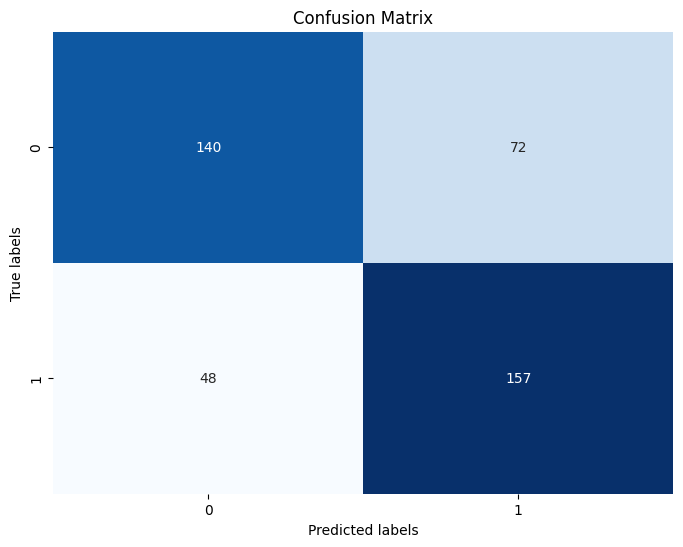

In [27]:
#Multi-Layer Perceptron (MLP)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=1)

# Standardize features by removing the mean and scaling to unit variance
'''scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)'''

# Initialize MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Predictions
y_pred = mlp.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/100
50/50 [==============================] - 2s 16ms/step - loss: 30.8296 - accuracy: 0.5300 - val_loss: 6.6798 - val_accuracy: 0.4720
Epoch 2/100
50/50 [==============================] - 0s 4ms/step - loss: 6.1298 - accuracy: 0.5580 - val_loss: 2.9209 - val_accuracy: 0.5840
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 2.0230 - accuracy: 0.6520 - val_loss: 2.7102 - val_accuracy: 0.6240
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 3.0879 - accuracy: 0.6600 - val_loss: 10.9102 - val_accuracy: 0.5840
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 8.0722 - accuracy: 0.5900 - val_loss: 2.8769 - val_accuracy: 0.5760
Epoch 6/100
50/50 [==============================] - 0s 4ms/step - loss: 4.6802 - accuracy: 0.6580 - val_loss: 2.5273 - val_accuracy: 0.7200
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 2.7781 - accuracy: 0.6980 - val_loss: 2.9317 - val_accuracy: 0.6720
Epoch 8/10

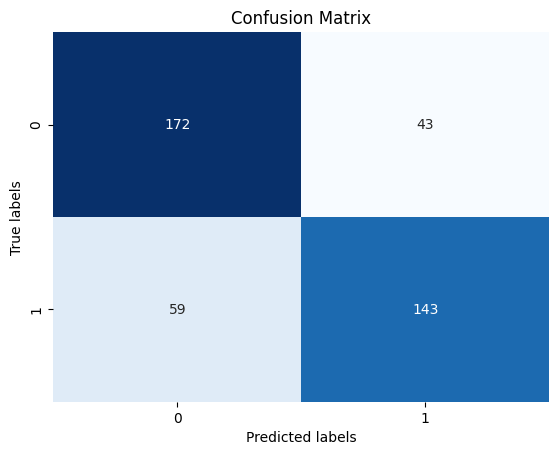

              precision    recall  f1-score   support

          No       0.74      0.80      0.77       215
         Yes       0.77      0.71      0.74       202

    accuracy                           0.76       417
   macro avg       0.76      0.75      0.75       417
weighted avg       0.76      0.76      0.75       417



In [38]:
#Backpropagation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=42)

# Build a simple neural network
model = Sequential()
model.add(Dense(50, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using backpropagation
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)


# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generate confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))
